# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np

import time
import requests

import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
import os
path = os.getcwd()
print(path)

/Users/jinyanxiang/Desktop/Data Science/Udacity/Data Analyst/Project 4_Twitter


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 
**Note:** the methods required to gather each data are different.
#### Gather the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [375]:
df_tw = pd.read_csv('twitter-archive-enhanced.csv')
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
df_tw.shape

(2356, 17)

#### Gather the tweet image prediction data (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

In [7]:
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [8]:
df_img = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_img.shape

(2075, 12)

#### Gather additional data from Tweepy (tweet_json.txt)

In [10]:
#Getting started with Tweepy

In [10]:
!pip install tweepy

In [11]:
!pip install tweepy[async]

zsh:1: no matches found: tweepy[async]


In [12]:
import tweepy

In [11]:
#Get authentication (elevated access required!!)

In [14]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

In [15]:
#Create API instance

In [16]:
api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True) #automatically wait for rate limits to replenish (useful for collecting large-number of requests) 

##NOTE: wait_on_rate_limit_notify is not an unexpected keyword argument and thus removed

In [17]:
#Take a look at a sample return
api.get_status(df_tw.tweet_id[1])

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/aQFSeaCu9L',
    'expanded_url': 'https://twitter.com/i/web/status/892177421306343426',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs®',
  'screen_name': 'dog_rates',
  'location': 'all our links ➜',
  'description': 'Your Only Source For Pro

In [18]:
#Find variables in interest:
## 1. 'id_str': tweet id (identifier) (type: string)
## 2. 'retweet_count': The number of retweets (type: int)
## 3. 'favorite_count': The number of Tweets this user has liked in the account’s lifetime (type: int)
## 4. 'created_at':The UTC datetime that the user account was created on Twitter. (type: string)

In [19]:
#Collect data from Twitter API

In [20]:
##Create a list for creating dataframe later
df_list = []
df_list_error = []

In [21]:
#Get the start time
import time
start = time.time()

for tweet_id in df_tw.tweet_id:
    try:
        output = api.get_status(tweet_id)
        
        retweets = output['retweet_count']
        favorites = output['favorite_count']
        creation_time = output['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'retweets': int(retweets),
                        'favorites': int(favorites),
                        'creation_time': pd.to_datetime(creation_time)})
    
    except Exception as errors:
        print(str(tweet_id)+ " _ " + str(errors))
        df_list_error.append(tweet_id)

#Get the end time
end = time.time()

#Calculate the total execution time
print('total_time',':', end-start)

888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366

Rate limit reached. Sleeping for: 785


754011816964026368 _ 404 Not Found
144 - No status found with that ID.
680055455951884288 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 787


total_time : 1873.493439912796


In [47]:
# N of results:
print('N of results retrieved is',':',len(df_list))
# N of errors:
print('N of errors received is',':',len(df_list_error))

N of results retrieved is : 2327
N of errors received is : 29


In [48]:
#Create the new dataframe
df_tweepy = pd.DataFrame(df_list)

In [49]:
#Check the error tweet_ids
df_tweepy_error = pd.DataFrame(df_list_error,columns={'tweet_id'})

In [50]:
df_tweepy_error.head()

,tweet_id
0,888202515573088257
1,873697596434513921
2,872668790621863937
3,872261713294495745
4,869988702071779329


In [51]:
df_list_recheck = []
df_list_error_recheck = []

#re-check the error tweets
for tweet_id in df_tweepy_error.tweet_id:
    try:
        retweets = output['retweet_count']
        favorites = output['favorite_count']
        creation_time = output['created_at']
        
        df_list_recheck.append({'tweet_id': int(tweet_id),
                        'retweets': int(retweets),
                        'favorites': int(favorites),
                        'creation_time': pd.to_datetime(creation_time)})
    
    except Exception as errors:
        print(str(tweet_id)+ " _ " + str(errors))
        df_list_error_recheck.append(tweet_id)

In [52]:
# N of recheck results:
print('N of results retrieved is',':',len(df_list_recheck))
# N of recheck errors:
print('N of errors received is',':',len(df_list_error_recheck))

N of results retrieved is : 29
N of errors received is : 0


In [53]:
# Combine the newly retrived data with the previously retrived data
df_tweepy = df_tweepy.append(df_list_recheck)

In [54]:
df_tweepy.head()

,tweet_id,retweets,favorites,creation_time
0,892420643555336193,6982,33725,2017-08-01 16:23:56+00:00
1,892177421306343426,5284,29252,2017-08-01 00:17:27+00:00
2,891815181378084864,3469,21988,2017-07-31 00:18:03+00:00
3,891689557279858688,7197,36809,2017-07-30 15:58:51+00:00
4,891327558926688256,7730,35194,2017-07-29 16:00:24+00:00


In [55]:
df_tweepy.shape

(2356, 4)

In [56]:
#Save the new dataframe
df_tweepy.to_csv('tweet_json.txt',encoding = 'utf-8', index = False)

In [57]:
df_tweepy_json = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_tweepy_json.head()

,tweet_id,retweets,favorites,creation_time
0,892420643555336193,6982,33725,2017-08-01 16:23:56+00:00
1,892177421306343426,5284,29252,2017-08-01 00:17:27+00:00
2,891815181378084864,3469,21988,2017-07-31 00:18:03+00:00
3,891689557279858688,7197,36809,2017-07-30 15:58:51+00:00
4,891327558926688256,7730,35194,2017-07-29 16:00:24+00:00


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### Quality issues: 
* completeness - whether we have all of the records we should
* validity - whether the data conforms to a defined scheme
* accuracy - whether the data is incorrect
* consistency - whether the data conforms to a standardized format

##### Tidiness issue:
* whether each variable forms a column
* whether each observation forms a row
* whether each type of observational unit forms a table

#### Assesing ```df_tw``` (i.e., ```twitter-archive-enhanced.csv```)

In [259]:
##Virtually (print the dataframe and also check it in excel)
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [59]:
##From virsual assessment, the dataset seems to have at least the following issues which are subject to progrmmatical assessment:
###some tweets has retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should always be none)
###irrelevant values in expanded_urls (e.g., https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1)
###invalid number in rating_numerator (e.g., 143, 121) and rating_denominator (e.g., 130, 110)
###invalid values for names (e.g., None, a, an, such)
###multiple columns for one variable - dog stage (doggo, pupper, puppo, floofer)

In [60]:
##Programmatically

###check information
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   int64  
 12  rating_denominator          2356 non-null   int64  
 13  name                        2356 

In [61]:
####some variables have incorrect categories: 

##### tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be STRING
##### timestamp, retweeted_status_timestamp should be DATETIME

#### retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp has non-null values which are not in our interest (we are only interested in original ratings without retweets

In [62]:
###check NAs
df_tw.isna().sum()

Unnamed: 0                       0
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [64]:
###check duplicates
df_tw.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [65]:
###check invalid values for rating_denominator
df_tw.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [66]:
###check invalid values for rating_numenators
df_tw.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [67]:
###check the total number of invalid values for rating_denominator
df_tw.query('rating_denominator != 10').shape[0]

23

In [68]:
###check values of names
df_tw.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### Assesing ```df_img``` (i.e., ```image-predictions.tsv```)

In [73]:
##Virtually (print the dataframe and also check it in excel)
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [74]:
##Programmatically

###check information
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
###check duplicates (no issue)
df_img.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [76]:
df_img.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [77]:
###there are duplicated jpg urls

In [78]:
###check the values of img_num (no issue)
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Assesing ```df_tweepy_json``` (i.e., ```tweet_json,text```)

In [52]:
##Virtually (print the dataframe and also check it in excel)
df_tweepy_json.to_csv('df_tweepy.csv',index=False)

In [79]:
pd.read_csv('df_tweepy.csv')

,tweet_id,retweets,favorites,creation_time
0,892420643555336193,7108,34218,2017-08-01 16:23:56+00:00
1,892177421306343426,5353,29671,2017-08-01 00:17:27+00:00
2,891815181378084864,3524,22346,2017-07-31 00:18:03+00:00
3,891689557279858688,7301,37373,2017-07-30 15:58:51+00:00
4,891327558926688256,7853,35715,2017-07-29 16:00:24+00:00
...,...,...,...,...
2351,766864461642756096,430,2307,2015-11-15 22:32:08+00:00
2352,759923798737051648,430,2307,2015-11-15 22:32:08+00:00
2353,759566828574212096,430,2307,2015-11-15 22:32:08+00:00
2354,754011816964026368,430,2307,2015-11-15 22:32:08+00:00


In [80]:
##Programmatically

###check information
df_tweepy_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2356 non-null   int64 
 1   retweets       2356 non-null   int64 
 2   favorites      2356 non-null   int64 
 3   creation_time  2356 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.8+ KB


In [81]:
###check duplicates
df_tweepy_json.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [56]:
####some variables have incorrect categories: 

##### tweet_id should be STRING
##### creation_time should be DATETIME

In [82]:
#check the values for retweets and favorites
df_tweepy_json[['retweets','favorites']].describe()

,retweets,favorites
count,2356.000000,2356.000000
mean,2438.044143,6975.299660
std,4151.807040,10874.401462
min,1.000000,0.000000
25%,476.000000,1247.000000
50%,1123.500000,3011.500000
75%,2826.250000,8468.000000
max,70485.000000,144420.000000


### Quality issues

1. Incorrect variable types for ID field variables (solution: change them to STRING variables):\
   1.1). ```tweet_id```, ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id``` in ```df_tw```\
   1.2). ```tweet_id``` in ```df_img``` \
   1.3). ```tweet_id``` in ```tweepy_json```

2. Incorrect variable types for timestamp variables (solution: change them to DATATIME variables):\
   1). ```timestamp```, ```retweeted_status_timestamp```in ```df_tw```\
   2). ```creation_time```in ```tweepy_json```
   
3. Some tweets have retweets in ```df_tw```  (i.e., non-null values for ```retweeted_status_id```, ```retweeted_status_user_id```, ```retweeted_status_timestamp```)(solution: drop all non-null entries)

4. Abnormal values in ```rating_denominator``` (e.g., 130, 110) and ```rating_numerator``` (e.g., 143, 121) in ```df_tw```(solution: go back and check the corresponding texts, find the patterns and correct the values)

5. Irrelvant urls and missing values (N = 59) in ```expanded_urls``` in ```df_tw```(solution: remove the irrelevant url and fill in missing values)

6. Redudant information in ```source``` in ```df_tw``` (solution: extract the key information)

7. Duplicated values for ```jpg_url``` (N = 66) in ```df_img```  (solution: drop duplicated values)

8. Missing values for some tweets (N = 2075 < 2356) in ```df_img```  (solution: drop tweets without images as we only want original ratings with images)

### Tidiness issues

1. The three seperate tables should be merged into one table

2. Multiple columns for one variable in ```df_tw``` -```dog_stage``` (```doggo```, ```pupper```, ```puppo```, ```floofer```) (solution: recode them into one variable - ```dog_stage```) 

3. Multiple predictions for one variable in ```df_img``` - ```dog_breed``` (```p1```, ```p2```, ```p3```)(solution: choose the algorithm with the highest accuracy and use that predicted breed as the value for ```dog_breed```))

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [85]:
#df_tw = pd.read_csv("df_tw.csv")
#df_img = pd.read_csv("df_img.csv")
df_tweepy_json = pd.read_csv("df_tweepy.csv")

In [376]:
# Make copies of original pieces of data
df_tw_clean = df_tw.copy()
df_img_clean = df_img.copy()
df_tweepy_json_clean = df_tweepy_json.copy()

### Issue #1: Incorrect variable types for ID field variables in each dataframe
### Issue #2: Incorrect variable types for timestamp variables in the corresponding dataframe

#### Define: 
 
1. correct incorrect variable types for ID field variables to STRING in each dataframe\
   1.1).in ```df_tw```: change the variable type of ```tweet_id```, ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id``` to STRING\
   1.2).in ```df_img```: change the variable type of ```tweet_id``` to STRING\
   1.3). in ```df_tweepy_json``` : change the variable type of ```tweet_id``` to STRING
2. correct incorrect variable types for timestamp to DATETIME in the corresponding dataframe\
   2.1).in ```df_tw```: change the variable type of ```timestamp```, ```retweeted_status_timestamp``` to DATETIME\
   2.2).in ```df_tweepy_json``` : change```creation_time``` to DATETIME

#### Code

In [69]:
#Define a function to change invalid variable types of ID field variables to STRING & Return corrected types

In [377]:
def ToString(df, val_list):
    df[val_list] = df[val_list].astype('string')
    return df[val_list].dtypes

In [378]:
## in df_tw
vals_tw = ['tweet_id','in_reply_to_status_id',
        'in_reply_to_user_id','retweeted_status_id',
        'retweeted_status_user_id']
ToString(df_tw_clean, vals_tw)

tweet_id                    string
in_reply_to_status_id       string
in_reply_to_user_id         string
retweeted_status_id         string
retweeted_status_user_id    string
dtype: object

In [379]:
## in df_img
vals_img = ['tweet_id']
ToString(df_img_clean, vals_img)

tweet_id    string
dtype: object

In [380]:
## in df_tweepy_json
vals_tweepy = ['tweet_id']
ToString(df_tweepy_json_clean, vals_tweepy)

tweet_id    string
dtype: object

In [381]:
#Define a function to change invalid variable types for timestamp to DATETIME and Return corrected types

In [382]:
def ToDateTime(df, val_name):
    df[val_name] = pd.to_datetime(df[val_name])
    return df[val_name].dtypes

In [383]:
## in df_tw
ToDateTime(df_tw_clean, 'timestamp') 

datetime64[ns, UTC]

In [384]:
ToDateTime(df_tw_clean, 'retweeted_status_timestamp')

datetime64[ns, UTC]

In [385]:
## in df_tweepy_json
ToDateTime(df_tweepy_json_clean, 'creation_time')

datetime64[ns, UTC]










#### Test

In [386]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   string             
 1   in_reply_to_status_id       78 non-null     string             
 2   in_reply_to_user_id         78 non-null     string             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    string             
 7   retweeted_status_user_id    181 non-null    string             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [387]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2009 non-null   string 
 1   jpg_url    2009 non-null   object 
 2   img_num    2009 non-null   int64  
 3   dog_breed  2009 non-null   object 
 4   p_conf     2009 non-null   float64
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 94.2+ KB


In [388]:
df_tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2356 non-null   string             
 1   retweets       2356 non-null   int64              
 2   favorites      2356 non-null   int64              
 3   creation_time  2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), string(1)
memory usage: 73.8 KB


### Issue #3: Some tweets have retweets that we are not interested in ```df_tw```

#### Define
1. Drop tweets that have retweets in ```df_tw``` (i.e., drop null-nans in ```retweeted_status_id``` and ```retweeted_status_user_id```)

#### Code

In [389]:
df_tw_clean.drop(df_tw_clean[df_tw_clean['retweeted_status_id'] != '<NA>'].index, inplace = True)

#### Test

In [390]:
df_tw_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #4: Anomaly of values in ```rating_denominator``` and ```rating_numerator``` in ```df_tw```

#### Define
1. Mannually check the dataset and detect the patterns of anomaly in rating_denominator and rating_numerator: \
   1). Refer to a group of dogs \
   2). Denominator has decimals and only the decimal part was extracted \
   3). More than two ratings are mentioned in the text
2. Correct values based on the detected anomaly
3. Drop redudant columns
4. Create a new variable: ```dog_rating``` to standardize the rating for future analysis

#### Code

In [391]:
#extract ratings from the text
ratings = df_tw_clean['text'].apply(lambda x: re.findall(r'((\d+|\d+\.\d+)/(\d+))', x))

In [392]:
ratings

0       [(13/10, 13, 10)]
1       [(13/10, 13, 10)]
2       [(12/10, 12, 10)]
3       [(13/10, 13, 10)]
4       [(12/10, 12, 10)]
              ...        
2351      [(5/10, 5, 10)]
2352      [(6/10, 6, 10)]
2353      [(9/10, 9, 10)]
2354      [(7/10, 7, 10)]
2355      [(8/10, 8, 10)]
Name: text, Length: 2175, dtype: object

In [393]:
#create lists to store corrected values
rating_numerator_corrected = []
rating_denominator_corrected = []

In [394]:
#add correct values to the created list
for rating in ratings:
    if len(rating) == 0:  # Tweets with no rating
        rating_numerator_corrected.append('NA')
        rating_denominator_corrected.append('NA')
    
    
    elif len(rating) == 1: # Tweets with one rating
        rating_numerator_corrected.append(float(rating[0][-2]))
        rating_denominator_corrected.append(float(rating[0][-1]))
 

    elif len(rating) > 1 and rating[0][-1] == '10' and rating[1][-1] == '10': # Tweets with at least two ratings
        rating_numerator_total = 0
        ratomg_numerator_avg = 0
        
        for i in range(len(rating)):
            rating_numerator_total += float(rating[i][-2])
        
        rating_numerator_avg = (rating_numerator_total / len(rating))
        
        rating_numerator_corrected.append(rating_numerator_avg)
        rating_denominator_corrected.append(10)
    
    else:
        rating_numerator_corrected.append('error')  # Tweets need mannual checks
        rating_denominator_corrected.append('error')

In [395]:
#append the created list to the dataframe
df_tw_clean['rating_numerator_corrected'] = rating_numerator_corrected
df_tw_clean['rating_denominator_corrected'] = rating_denominator_corrected

In [396]:
#INSTANT CHECK
#df_tw_clean.head()

In [397]:
#look at the the rows with error values of rating_numerator
pd.set_option("display.max_colwidth", None)
df_tw_clean.query('rating_numerator_corrected == "error"')[['text','rating_numerator_corrected','rating_denominator_corrected','rating_numerator','rating_denominator']]

,text,rating_numerator_corrected,rating_denominator_corrected,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",error,error,960,0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",error,error,9,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,error,error,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,error,error,50,50
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,error,error,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,error,error,1,2


In [398]:
#based on the mannual check, some outlier values are true outlier values and should be kept as it is while some are errors due to multiple fraction values in the text and should be mannually corrected

In [399]:
#create a function for correcting error values
def correct_values(correction_dict):
    for key, value in correction_dict.items():
        df_tw_clean.loc[key,['rating_numerator_corrected','rating_denominator_corrected']] = value

In [400]:
#create a dictionary for the correct values based on the mannual check for denominator
correction_dict = {313:[13,10],1068:[14,10],1165:[13,10],
                      1202:[11,10],1662:[10,10],2335:[9,10]}

In [401]:
#replace the error values with correct values 
correct_values(correction_dict)

In [402]:
#INSTANT CHECK: 
#df_tw_clean.query('rating_numerator_corrected == "error"')[['text','rating_numerator_corrected','rating_denominator_corrected','rating_numerator','rating_denominator']]

In [403]:
#check the NA values
df_tw_clean.query('rating_numerator_corrected == "NA"')[['text','rating_numerator_corrected','rating_denominator_corrected','rating_numerator','rating_denominator']]

,text,rating_numerator_corrected,rating_denominator_corrected,rating_numerator,rating_denominator


In [404]:
#recheck all ratings with non-10 denominator
df_tw_clean.query('rating_denominator_corrected !=10')[['text','rating_numerator_corrected','rating_denominator_corrected','rating_numerator','rating_denominator']]

,text,rating_numerator_corrected,rating_denominator_corrected,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11.0,15.0,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,44,40


In [405]:
#the row with index 516 has no rating (24/7 means 24 hours/7 days) which is incorrect and should be dropped
df_tw_clean.drop(index = 516, inplace = True)

In [406]:
#INSTANT CHECK: 
df_tw_clean.query('index == 516')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator_corrected,rating_denominator_corrected


In [407]:
#create a new variable: dog_rating (=rating_numerator/rating_denominator)
df_tw_clean['dog_rating'] = df_tw_clean['rating_numerator_corrected']/df_tw_clean['rating_denominator_corrected']

In [408]:
#drop rating_numerator and rating_denominator
df_tw_clean.drop(columns = ['rating_numerator','rating_denominator'], inplace = True)

#### Test

In [409]:
#recheck the info of df_tw_clean (esp. variable types)
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2174 non-null   string             
 1   in_reply_to_status_id         78 non-null     string             
 2   in_reply_to_user_id           78 non-null     string             
 3   timestamp                     2174 non-null   datetime64[ns, UTC]
 4   source                        2174 non-null   object             
 5   text                          2174 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 2116 non-null   object             
 10  name                          2174 n

In [410]:
#change the variable type of rating_numerator, rating_denominator and dog_rating to float
df_tw_clean[['rating_numerator_corrected','rating_denominator_corrected', 'dog_rating']] = df_tw_clean[['rating_numerator_corrected','rating_denominator_corrected','dog_rating']].astype('float64')

In [411]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2174 non-null   string             
 1   in_reply_to_status_id         78 non-null     string             
 2   in_reply_to_user_id           78 non-null     string             
 3   timestamp                     2174 non-null   datetime64[ns, UTC]
 4   source                        2174 non-null   object             
 5   text                          2174 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 2116 non-null   object             
 10  name                          2174 n

In [412]:
#check the basic statistics of dog_rating
df_tw_clean.dog_rating.describe()

count    2174.000000
mean        1.218941
std         4.244993
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: dog_rating, dtype: float64

In [413]:
df_tw_clean.dtypes

tweet_id                                     string
in_reply_to_status_id                        string
in_reply_to_user_id                          string
timestamp                       datetime64[ns, UTC]
source                                       object
text                                         object
retweeted_status_id                          string
retweeted_status_user_id                     string
retweeted_status_timestamp      datetime64[ns, UTC]
expanded_urls                                object
name                                         object
doggo                                        object
floofer                                      object
pupper                                       object
puppo                                        object
rating_numerator_corrected                  float64
rating_denominator_corrected                float64
dog_rating                                  float64
dtype: object

### Issue #5: Missing and irrelevant information in ```expanded_urls``` in ```df_tw```

#### Define
1.  Fill missing values based on ```tweet_id```
2. Remove the non-twitter links (e.g., ```https://gofundme.com/ydvmve-surgery-for-jax``` in ```https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1```) from ```expanded_urls``` and store these non-twitter links in a new variable -- ```additional_urls```

#### Code

In [414]:
#find tweets with missing expanded_urls and store nthem in a list:
MissingUrls_index = np.where(df_tw_clean['expanded_urls'].isna())[0]

In [415]:
MissingUrls_index

array([  29,   52,   61,  101,  130,  156,  160,  162,  163,  187,  196,
        200,  234,  246,  247,  263,  287,  290,  316,  326,  345,  358,
        412,  426,  469,  474,  491,  563,  568,  680,  693,  791,  829,
        901, 1115, 1165, 1265, 1266, 1294, 1299, 1317, 1343, 1418, 1425,
       1438, 1483, 1509, 1594, 1639, 1664, 1715, 1725, 1734, 1760, 1858,
       1969, 2009, 2116])

In [416]:
len(MissingUrls_index)

58

In [417]:
#change the variable type of expanded_urls from object to string
df_tw_clean['expanded_urls'] = df_tw_clean['expanded_urls'].astype('string')

In [418]:
#fill the missing information
for i in MissingUrls_index:
    filled_id = df_tw_clean['tweet_id'].iloc[i]
    filled_url = 'https://twitter.com/dog_rates/status/'+filled_id+'/photo/1'
    df_tw_clean['expanded_urls'].iloc[i] = filled_url

In [419]:
#randomly check the tweets missing Urls and see if the correct urls has been filled
df_tw_clean[['tweet_id','expanded_urls']].iloc[6]

tweet_id                                                                                                  890971913173991426
expanded_urls    https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
Name: 6, dtype: string

In [420]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2174 non-null   string             
 1   in_reply_to_status_id         78 non-null     string             
 2   in_reply_to_user_id           78 non-null     string             
 3   timestamp                     2174 non-null   datetime64[ns, UTC]
 4   source                        2174 non-null   object             
 5   text                          2174 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 2174 non-null   string             
 10  name                          2174 n

In [421]:
df_tw_clean[['expanded_urls']]

,expanded_urls
0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
...,...
2351,https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352,https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353,https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354,https://twitter.com/dog_rates/status/666029285002620928/photo/1


In [422]:
#create a list to store these all urls
url_lists = []
for k, url in enumerate (df_tw_clean['expanded_urls']):
    url_lists.append(url.split(','))

In [423]:
# create two dictionaries to seperate twitter links and non twitter links
url_twitter_dict = {}
url_nontwitter_dict = {}

for index, url_list in enumerate(url_lists):
    url_twitter = []
    url_nontwitter = []
    for url in url_list:
        if 'twitter.com' in url:
            url_twitter.append(url)
        else:
            url_nontwitter.append(url)
    url_twitter_dict[index] = ",".join(url_twitter)
    url_nontwitter_dict[index] = ",".join(url_nontwitter)

In [424]:
# reset index of ```df_tw``` because some rows were deleted 
df_tw_clean.reset_index(inplace = True)
df_tw_clean.drop (columns = ['index'], inplace = True)

In [425]:
#create a new variable ```additional_urls``` and store non twitter links there
#update ```expanded_urls``` with twitter links only
df_tw_clean['expanded_urls'] = pd.Series(url_twitter_dict)

df_tw_clean['additional_urls'] = ""
df_tw_clean['additional_urls']= pd.Series(url_nontwitter_dict)

In [426]:
# replace " " with NaN
df_tw_clean['additional_urls'].replace(r'', np.NaN, inplace = True)
df_tw_clean['expanded_urls'].replace(r'', np.NaN, inplace = True)

#### Test

In [427]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2174 non-null   string             
 1   in_reply_to_status_id         78 non-null     string             
 2   in_reply_to_user_id           78 non-null     string             
 3   timestamp                     2174 non-null   datetime64[ns, UTC]
 4   source                        2174 non-null   object             
 5   text                          2174 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 2080 non-null   object             
 10  name                          2174 n

In [428]:
df_tw_clean.expanded_urls.isna().value_counts()

False    2080
True       94
Name: expanded_urls, dtype: int64

In [429]:
df_tw_clean.additional_urls.isna().value_counts()

True     2053
False     121
Name: additional_urls, dtype: int64

In [430]:
#some random check
np.where(df_tw_clean['expanded_urls'].isna()==True)

(array([ 282,  371,  440,  463,  528,  539,  561,  574,  575,  590,  592,
        602,  608,  631,  714,  718,  735,  765,  767,  771,  775,  778,
        809,  820,  823,  830,  835,  843,  845,  855,  872,  883,  896,
        916,  929,  967, 1015, 1022, 1027, 1029, 1038, 1042, 1048, 1075,
       1077, 1095, 1098, 1106, 1119, 1121, 1133, 1146, 1169, 1184, 1189,
       1196, 1229, 1247, 1251, 1263, 1269, 1281, 1286, 1291, 1302, 1322,
       1325, 1335, 1348, 1354, 1369, 1386, 1390, 1397, 1406, 1412, 1416,
       1445, 1448, 1460, 1470, 1496, 1526, 1548, 1563, 1570, 1580, 1596,
       1611, 1627, 1638, 1654, 1736, 2032]),)

In [431]:
df_tw_clean[['additional_urls','expanded_urls']].iloc[371]

additional_urls    http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_
expanded_urls                                                                                                                                                                            NaN
Name: 371, dtype: object

### Issue #6: Redudant information in ```source``` in ```df_img```

#### Define
1. Extract key information

#### Code

In [158]:
df_tw_clean['source'] = df_tw_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [159]:
df_tw_clean['source'] 

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2174, dtype: object

### Issue #7: Duplicated values for ```jpg_url``` in ```df_img```

#### Define
1. Drop duplicated values

#### Code

In [160]:
#drop duplicated jpg urls
df_img_clean.drop_duplicates(subset = ['jpg_url'], inplace = True)

#### Test

In [161]:
#check whether there are still duplicated urls
df_img_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

### Issue #8: Missing imagines for some tweets (N of df_img < N of df_tw) in ```df_img```

#### Define
1. use inner merge when creating the master dataset to drop the tweets missing imagines as we are only interested in tweets with imagines

#### Code
1. See the codes for merging the datasets and creating the master dataset

#### Test
1. See the test after merging the datasets and creating the master dataset

### Issue #9: Multiple columns for one variable - dog_stage (```doggo```, ```pupper```, ```puppo```, ```floofer```) in ```df_tw```

#### Define
1. Check different types of dog_stages
2. Store dog stage informations in to one variable: ```dog_stage```
3. Drop ```doggo```, ```pupper```, ```puppo```, ```floofer```

#### Code

In [124]:
#Check the types of of dog stages

In [432]:
dog_stages = ['doggo','pupper','puppo','floofer']
for stage in dog_stages:
    df_tw_clean.replace('None','',inplace=True)

In [433]:
df_tw_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1830
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [434]:
## the results show there are dogs with multiple stages (i.e., 'doggo, puppo','doggo, pupper','doggo, floofer')

In [435]:
#create an empty column named "dog_stage"
df_tw_clean['dog_stage'] = "" 

In [436]:
#store all the dog stage information in the new variable "dog_stage"
df_tw_clean.dog_stage = df_tw_clean.doggo + df_tw_clean.floofer + df_tw_clean.pupper + df_tw_clean.puppo

In [437]:
df_tw_clean['dog_stage'].value_counts()

                1830
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [438]:
#rename multiple dog stages with comma to seperate the two stages

In [439]:
df_tw_clean.loc[df_tw_clean.dog_stage == 'doggopupper','dog_stage'] = 'doggo, pupper'

In [440]:
df_tw_clean.loc[df_tw_clean.dog_stage == 'doggopuppo','dog_stage'] = 'doggo, puppo'

In [441]:
df_tw_clean.loc[df_tw_clean.dog_stage == 'doggofloofer','dog_stage'] = 'doggo, floofer'

In [442]:
df_tw_clean['dog_stage'].value_counts()

                  1830
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [443]:
#check these dogs with multiple dog stages to see if they are truly in multiple stages or it was due to misinterpretation of the text

In [444]:
## create a new variable "dog_stage_multiple"
df_tw_clean['dog_stage_multiple'] = ""
df_tw_clean.dog_stage_multiple = np.where((df_tw_clean['dog_stage'] == 'doggo, pupper') | (df_tw_clean['dog_stage'] == 'doggo, puppo') | (df_tw_clean['dog_stage'] =='doggo, floofer'),'True','False')

In [445]:
df_tw_clean['dog_stage_multiple'].value_counts()

False    2162
True       12
Name: dog_stage_multiple, dtype: int64

In [446]:
##retrieve "tweet_id",'text' for dogs with mulitple stages and mannually read the text information

In [447]:
df_tw_clean[['tweet_id','text','dog_stage','dog_stage_multiple']].query('dog_stage_multiple == "True"')

,tweet_id,text,dog_stage,dog_stage_multiple
165,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,"doggo, puppo",True
172,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","doggo, floofer",True
382,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7","doggo, pupper",True
441,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,"doggo, pupper",True
466,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze","doggo, pupper",True
473,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"doggo, pupper",True
566,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"doggo, pupper",True
592,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u","doggo, pupper",True
721,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","doggo, pupper",True
780,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,"doggo, pupper",True


In [367]:
## based on the text, it shows some multiple dog stages are not truly multiple dog stages:
### 165: doggo; ### 172: floofer; ### 382:doggo; ###473:pupper ###566: doggo ###780: NA(as doggo or pupper does not describe the dog itself)

In [448]:
### correct the values for dog_stages based on the mannual check
def correct_values2(correction_dict):
    for key, value in correction_dict.items():
        df_tw_clean.loc[key,['dog_stage']] = value
        

correction_dict2 = {165:'doggo',172:'floofer',382:'doggo',
                    473:'pupper',566:'doggo',780:''}

In [449]:
correct_values2(correction_dict2)

In [450]:
df_tw_clean.dog_stage.value_counts()

                 1831
pupper            225
doggo              78
puppo              24
floofer            10
doggo, pupper       6
Name: dog_stage, dtype: int64

In [451]:
#add none values for missing dog_stage
df_tw_clean.dog_stage.replace('','None',inplace = True)

In [452]:
#drop doggo, pupper, puppo, floofer columns
df_tw_clean.drop(columns = dog_stages, inplace = True)

#### Test

In [453]:
#check whether doggo, pupper, puppo, floofer columns have been dropped
df_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name',
       'rating_numerator_corrected', 'rating_denominator_corrected',
       'dog_rating', 'additional_urls', 'dog_stage', 'dog_stage_multiple'],
      dtype='object')

In [454]:
#check the values for the new variable - dog_stage
df_tw_clean.dog_stage.value_counts()

None             1831
pupper            225
doggo              78
puppo              24
floofer            10
doggo, pupper       6
Name: dog_stage, dtype: int64

### Issue #10: Multiple predictions for one variable - ```dog_breed``` (```p1```, ```p2```, ```p3```) in ```df_img```

### Define
1. Choose the algorithm predicting dog correctly (since all pictures are indeed dogs) and with the highest accuracy (note that p1_conf > p2_conf > p3_conf)
2. Create two new variable: ```dog_breed``` and ```p_conf```
4. Add values for the two new variables 
3. Drop ```p1```, ```p2```, ```p3```,```p1_cof```, ```p2_cof```, ```p3_cof```,```p1_dog```, ```p2_dog```, ```p3_dog```

#### Code

In [182]:
dog_breed_list = []
p_conf_list = []

#create a function for adding values to dog_breed and p_conf
def assign_dog_breed(df):
    
    if df['p1_dog'] == True:
        dog_breed_list.append(df['p1'])
        p_conf_list.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_breed_list.append(df['p2'])
        p_conf_list.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_breed_list.append(df['p3'])
        p_conf_list.append(df['p3_conf'])
    else:
        dog_breed_list.append('NA')
        p_conf_list.append(0)

In [183]:
#apply the function to df_img_clean
df_img_clean.apply(assign_dog_breed, axis=1)
df_img_clean['dog_breed'] = dog_breed_list
df_img_clean['p_conf'] = p_conf_list

In [184]:
#drop p1, p2, p3,p1_cof, p2_cof, p3_cof,p1_dog, p2_dog, p3_dog
df_img_clean.drop(columns = ['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'],inplace = True)

In [185]:
df_img_clean

,tweet_id,jpg_url,img_num,dog_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581


In [186]:
#make all dog breed to be lower case
df_img_clean.dog_breed = df_img_clean.dog_breed.str.lower()

#### Test

In [187]:
#check whether redudant variables have been dropped and whether all dog breeds are written in lower case
df_img_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [188]:
#check the values of dog_breed
df_img_clean.dog_breed.value_counts()

na                      318
golden_retriever        158
labrador_retriever      108
pembroke                 95
chihuahua                91
                       ... 
scotch_terrier            1
entlebucher               1
japanese_spaniel          1
standard_schnauzer        1
bouvier_des_flandres      1
Name: dog_breed, Length: 114, dtype: int64

In [189]:
#check the types of new variable
df_img_clean.dtypes

tweet_id      string
jpg_url       object
img_num        int64
dog_breed     object
p_conf       float64
dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Recheck all datasets before merge

In [203]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2174 non-null   string             
 1   in_reply_to_status_id         78 non-null     string             
 2   in_reply_to_user_id           78 non-null     string             
 3   timestamp                     2174 non-null   datetime64[ns, UTC]
 4   source                        2174 non-null   object             
 5   text                          2174 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 2174 non-null   string             
 10  name                          2174 n

In [191]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2009 non-null   string 
 1   jpg_url    2009 non-null   object 
 2   img_num    2009 non-null   int64  
 3   dog_breed  2009 non-null   object 
 4   p_conf     2009 non-null   float64
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 94.2+ KB


In [192]:
df_tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2356 non-null   string             
 1   retweets       2356 non-null   int64              
 2   favorites      2356 non-null   int64              
 3   creation_time  2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), string(1)
memory usage: 73.8 KB


### Merge datasets to create the master datasets

In [455]:
#create the master dataset
df_master = df_tw_clean.merge(df_img_clean,how = 'inner', on = 'tweet_id').merge(df_tweepy_json_clean, how = 'inner', on = 'tweet_id')

In [456]:
#check the shape of the master dataset
df_master.shape

(1993, 24)

In [457]:
#check the information of the master dataset
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1993 non-null   string             
 1   in_reply_to_status_id         23 non-null     string             
 2   in_reply_to_user_id           23 non-null     string             
 3   timestamp                     1993 non-null   datetime64[ns, UTC]
 4   source                        1993 non-null   object             
 5   text                          1993 non-null   object             
 6   retweeted_status_id           0 non-null      string             
 7   retweeted_status_user_id      0 non-null      string             
 8   retweeted_status_timestamp    0 non-null      datetime64[ns, UTC]
 9   expanded_urls                 1993 non-null   object             
 10  name                          1993 n

In [458]:
#drop variables that ahve missing values and are not interested in: 
#in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_master.drop(columns = drop_columns, inplace = True)

In [459]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating_numerator_corrected', 'rating_denominator_corrected',
       'dog_rating', 'additional_urls', 'dog_stage', 'dog_stage_multiple',
       'jpg_url', 'img_num', 'dog_breed', 'p_conf', 'retweets', 'favorites',
       'creation_time'],
      dtype='object')

In [460]:
#reorder the variables by importance
df_master = df_master[['tweet_id','dog_rating', 'dog_stage','dog_breed',
           'retweets', 'favorites', 'img_num',
           'creation_time','timestamp',
           'p_conf', 'rating_numerator_corrected', 'rating_denominator_corrected',
           'name','source',
           'text',
           'expanded_urls', 'jpg_url','additional_urls']]

In [461]:
df_master.additional_urls.iloc[1]

nan

In [462]:
#make the expression of 'None','na','np.NaN' consistent (to be 'NA')
df_master.replace(np.NaN,'NA',inplace = True)

In [463]:
df_master.replace('None','NA',inplace = True)

In [464]:
df_master.replace('NaN','NA',inplace = True)

In [465]:
#check df_master
df_master.head()

,tweet_id,dog_rating,dog_stage,dog_breed,retweets,favorites,img_num,creation_time,timestamp,p_conf,rating_numerator_corrected,rating_denominator_corrected,name,source,text,expanded_urls,jpg_url,additional_urls
0,892420643555336193,1.3,NA,na,7108,34218,1,2017-08-01 16:23:56+00:00,2017-08-01 16:23:56+00:00,0.000000,13.0,10.0,Phineas,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NA
1,892177421306343426,1.3,NA,chihuahua,5353,29671,1,2017-08-01 00:17:27+00:00,2017-08-01 00:17:27+00:00,0.323581,13.0,10.0,Tilly,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NA
2,891815181378084864,1.2,NA,chihuahua,3524,22346,1,2017-07-31 00:18:03+00:00,2017-07-31 00:18:03+00:00,0.716012,12.0,10.0,Archie,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NA
3,891689557279858688,1.3,NA,labrador_retriever,7301,37373,1,2017-07-30 15:58:51+00:00,2017-07-30 15:58:51+00:00,0.168086,13.0,10.0,Darla,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NA
4,891327558926688256,1.2,NA,basset,7853,35715,2,2017-07-29 16:00:24+00:00,2017-07-29 16:00:24+00:00,0.555712,12.0,10.0,Franklin,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NA


### Create ```dog_gender``` which is useful for analysis

In [466]:
#create a new variable dog_gender
test = df_master.copy()

In [467]:
#create a gender-related word list
male = ['he', 'him', 'his', "he's", 'himself', 'boy']
female = ['she', 'her', 'hers',"she's", 'herself', 'girl']

In [468]:
#create a list to store gender information
dog_gender = []

In [469]:
for t in df_master.text:
    if any(map(lambda g:g in male, t.lower().replace('.','').split())): #make text lower case#
        dog_gender.append('male')

    elif any(map(lambda g:g in female, t.lower().replace('.','').split())):
        dog_gender.append('female')
    
    else:
        dog_gender.append('NA')

In [470]:
#insert dog_gender into the master dataframe (after dog_breed)
df_master.insert(4, "dog_gender", dog_gender)

In [471]:
#INSTANT CHECK
#df_master.head()

In [472]:
#check values of dog_gender
df_master.dog_gender.value_counts()

male      1028
NA         627
female     338
Name: dog_gender, dtype: int64

In [473]:
#some random checks on the assigned gender and corresponding text
df_master.query('dog_gender == "female"')['text']

1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
8                       This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
9            This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
12                                      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
                                                                                       ...                                                       

In [474]:
df_master.query('dog_gender == "male"')['text']

0                                                                This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
2                            This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
4           This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7                               When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
                                                                                         ...                                 

In [475]:
df_master.query('dog_gender == "NA"')['text']

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
21                                    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
23                                                        You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
24               This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
28             This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox
                                                                                       ...                                                       

### Recheck the master dataframe

In [476]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1993 non-null   string             
 1   dog_rating                    1993 non-null   float64            
 2   dog_stage                     1993 non-null   object             
 3   dog_breed                     1993 non-null   object             
 4   dog_gender                    1993 non-null   object             
 5   retweets                      1993 non-null   int64              
 6   favorites                     1993 non-null   int64              
 7   img_num                       1993 non-null   int64              
 8   creation_time                 1993 non-null   datetime64[ns, UTC]
 9   timestamp                     1993 non-null   datetime64[ns, UTC]
 10  p_conf                        1993 n

### Save the master data as csv file

In [477]:
df_master.to_csv('df_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### PRE-ANALYSIS: clean the variable ```dog_rating``` for further analysis

In [478]:
#drop outliers of dog_rating for further analysis
##find 5% and 95% percentile value of dog_rating
per_5 = np.percentile(df_master['dog_rating'],5)
per_95 = np.percentile(df_master['dog_rating'],95)

print('5% percentile of rating is',per_5)
print('95% percentile of rating is',per_95)

5% percentile of rating is 0.6
95% percentile of rating is 1.3


In [481]:
#create a new dataframe for analysis
df_analysis = df_master.copy()

In [430]:
#drop outliers
df_analysis.drop(df_analysis[(df_analysis['dog_rating'] < 0.6) |(df_analysis['dog_rating'] > 1.3)].index, inplace = True)

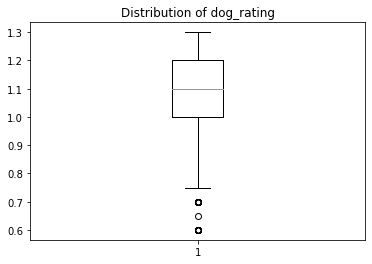

In [431]:
#check the distribution of cleaned dog_rating
plt.boxplot(df_analysis['dog_rating'])
plt.title('Distribution of dog_rating')
plt.show()

In [432]:
#check the statistics df_analysis
df_analysis.dog_rating.describe()

count    1874.000000
mean        1.077585
std         0.163335
min         0.600000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.300000
Name: dog_rating, dtype: float64

#### NOW, ```dog_rating```, the focal dependent variable (DV) is READY for analysis

#### Check statistics or frequencies of independent variables

In [433]:
#check statistics continuous variables 
df_analysis[['dog_rating','retweets','favorites','img_num']].describe()

,dog_rating,retweets,favorites,img_num
count,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.077585,2173.368196,7521.945037,1.199573
std,0.163335,3936.772935,11091.021350,0.548434
min,0.600000,11.000000,66.000000,1.000000
25%,1.000000,489.250000,1711.000000,1.000000
50%,1.100000,1072.500000,3456.000000,1.000000
75%,1.200000,2487.750000,9397.500000,1.000000
max,1.300000,70485.000000,144420.000000,4.000000


In [434]:
#check frequencies of discrete/categorical variables
def check_frequencies(variable):
    freq_table = pd.DataFrame([df_analysis[variable].value_counts(),df_analysis[variable].value_counts(normalize=True)],index = ['number','percent']).T
    freq_table
    return (freq_table)

In [435]:
#check frequencies of n of images
check_frequencies('img_num')

,number,percent
1,1606.0,0.856990
2,188.0,0.100320
3,54.0,0.028815
4,26.0,0.013874


In [436]:
#check frequencies of dog stage
check_frequencies('dog_stage')

,number,percent
NA,1586.0,0.846318
pupper,195.0,0.104055
doggo,59.0,0.031483
puppo,21.0,0.011206
floofer,8.0,0.004269
"doggo, pupper",5.0,0.002668


In [437]:
#check frequencies of dog stage
check_frequencies('dog_gender')

,number,percent
male,979.0,0.522412
NA,569.0,0.303629
female,326.0,0.173959


In [438]:
#check frequencies of dog breed
pd.set_option('display.max_rows', 120)
check_frequencies('dog_breed')

,number,percent
NA,241.0,0.128602
golden_retriever,153.0,0.081644
labrador_retriever,107.0,0.057097
pembroke,89.0,0.047492
chihuahua,87.0,0.046425
pug,61.0,0.032551
toy_poodle,51.0,0.027215
chow,48.0,0.025614
pomeranian,41.0,0.021878
samoyed,41.0,0.021878


In [439]:
#list of breeds only appear once
check_frequencies('dog_breed').query('number == 1.0').index

Index(['irish_wolfhound', 'standard_schnauzer', 'clumber',
       'bouvier_des_flandres', 'entlebucher', 'scotch_terrier',
       'silky_terrier', 'black-and-tan_coonhound'],
      dtype='object')

#### H1: dog rating is postively correlated with N of retweets, favorites and images posted

#### Analysis

In [440]:
df_analysis[['dog_rating','retweets','favorites','img_num']].describe()

,dog_rating,retweets,favorites,img_num
count,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.077585,2173.368196,7521.945037,1.199573
std,0.163335,3936.772935,11091.021350,0.548434
min,0.600000,11.000000,66.000000,1.000000
25%,1.000000,489.250000,1711.000000,1.000000
50%,1.100000,1072.500000,3456.000000,1.000000
75%,1.200000,2487.750000,9397.500000,1.000000
max,1.300000,70485.000000,144420.000000,4.000000


In [441]:
df_analysis[['dog_rating','retweets','favorites','img_num']].corr()

,dog_rating,retweets,favorites,img_num
dog_rating,1.000000,0.312636,0.419268,0.183771
retweets,0.312636,1.000000,0.927961,0.083979
favorites,0.419268,0.927961,1.000000,0.106701
img_num,0.183771,0.083979,0.106701,1.000000


#### Conclusion: consistent with H1, dog rating has a moderate positive correlation with number of retweets and number of favorites and a relatively week correlation with number of images posted.

-------

#### H2: female dogs would receive higher dog rating than male dogs and dogs who do not specify gender  (i.e., rating_female > rating_male & rating_female > rating_wo/gender)

#### Analysis

In [442]:
#conduct ANOVA to first check whether there is siginficant group difference across the three groups
model_gender = ols('dog_rating ~ C(dog_gender)', data=df_analysis).fit()
anova_gender = sm.stats.anova_lm(model_gender, typ=2)
anova_gender

,sum_sq,df,F,PR(>F)
C(dog_gender),0.857893,2.0,16.341942,9.205800e-08
Residual,49.110374,1871.0,NaN,NaN


In [443]:
#since there is significant group difference, do a follow-up pairwise comparison to see how each two groups are different

In [444]:
tukey_gender = pairwise_tukeyhsd(endog=df_analysis['dog_rating'],
                          groups=df_analysis['dog_gender'],
                          alpha=0.05)
print(tukey_gender)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    NA female   0.0598  0.001  0.0334  0.0862   True
    NA   male    0.006 0.7418  -0.014   0.026  False
female   male  -0.0538  0.001 -0.0781 -0.0295   True
----------------------------------------------------


In [445]:
print(tukey_gender)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    NA female   0.0598  0.001  0.0334  0.0862   True
    NA   male    0.006 0.7418  -0.014   0.026  False
female   male  -0.0538  0.001 -0.0781 -0.0295   True
----------------------------------------------------


#### Conclusion: consistent with the H2, female dogs receive significantly higher dog rating than male dogs (p = 0.001) and dogs who do not specify genders (p = 0.001). No difference is found between male dogs and dogs who do not specify gender (p = 0.74).

--------

#### H3: dog stage may also have impact on dog rating, but there is a priori hypothesis on the patterns of the impact

#### Analysis

In [446]:
#conduct ANOVA to first check whether there is siginficant group difference across the six groups 
model_stage = ols('dog_rating ~ C(dog_stage)', data=df_analysis).fit()
anova_stage = sm.stats.anova_lm(model_stage, typ=2)
anova_stage

,sum_sq,df,F,PR(>F)
C(dog_stage),0.950273,5.0,7.242688,9.965763e-07
Residual,49.017994,1868.0,NaN,NaN


In [477]:
df_analysis.groupby(['dog_stage','dog_gender']).mean()[['dog_rating']]

dog_rating
dog_stage     dog_gender            
NA            NA            1.049662
              female        1.124354
              male          1.071938
doggo         NA            1.184211
              female        1.208333
              male          1.132143
doggo, pupper NA            1.180000
floofer       NA            1.200000
              male          1.183333
pupper        NA            1.108219
              female        1.076486
              male          1.009195
puppo         NA            1.150000
              female        1.187500
              male          1.211111

In [447]:
#since there is significant group difference, do a follow-up pairwise comparison to see how each two groups are different
tukey_stage = pairwise_tukeyhsd(endog=df_analysis['dog_rating'],
                          groups=df_analysis['dog_stage'],
                          alpha=0.05)
print(tukey_stage)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
           NA         doggo   0.0901  0.001  0.0288  0.1513   True
           NA doggo, pupper   0.1057  0.668 -0.1013  0.3126  False
           NA       floofer   0.1132 0.3603 -0.0506  0.2769  False
           NA        pupper   -0.016 0.7569 -0.0511  0.0191  False
           NA         puppo   0.1161 0.0142  0.0146  0.2176   True
        doggo doggo, pupper   0.0156    0.9 -0.1996  0.2308  False
        doggo       floofer   0.0231    0.9  -0.151  0.1972  False
        doggo        pupper  -0.1061  0.001 -0.1747 -0.0374   True
        doggo         puppo   0.0261    0.9 -0.0914  0.1435  False
doggo, pupper       floofer   0.0075    0.9 -0.2559  0.2709  False
doggo, pupper        pupper  -0.1217 0.5514 -0.3309  0.0876  False
doggo, pupper         puppo   0.0105    0.9 -0.2195  0.2404  F

#### Conclusion: pupper dogs receive lower dog rating than doggo (p = 0.001) and puppo (p = 0.005) dogs and both doggo (p = 0.001) and puppo (p = 0.014) dogs receive higher dog rating than dogs who do not specify dog stage.

### Insights (key):
**1. The popularity of tweets have positive impact on dog rating: dogs in a tweet receive higher ratings as the number of retweets and favorites of the tweet increases.**

**2. Information of dog has an impact of dog rating: dogs who have more images receive higher ratings.**

**3. Gender has significant impacts on dog rating: female dogs receive higher ratings than male dogs and dogs who do not specify genders.**

**4. Dog stage also has significant impacts on dog rating: pupper dogs receive lower dog rating than doggo dogs and puppo dogs.**

*5. Caveat for insights 3 and 4: the sample size for each group of dog gender and dog stage is uneven which lead to loss of statistical power, so, interpret the ANOVA results with cautious; fortunately, the issue is partially taken care by the post-hoc Tukey test*

### Visualization

#### Create a bar chart to see whether there the impact of dog gender on dog rating is universal to all dog stages

In [483]:
sns.set_theme(style="whitegrid", palette="pastel")

In [474]:
conclusion = 'Notes: female dogs receive the highest rating only among doggo dogs and when dog stage is not specified, suggesting an interaction between dog gender and dog stage on dog rating'

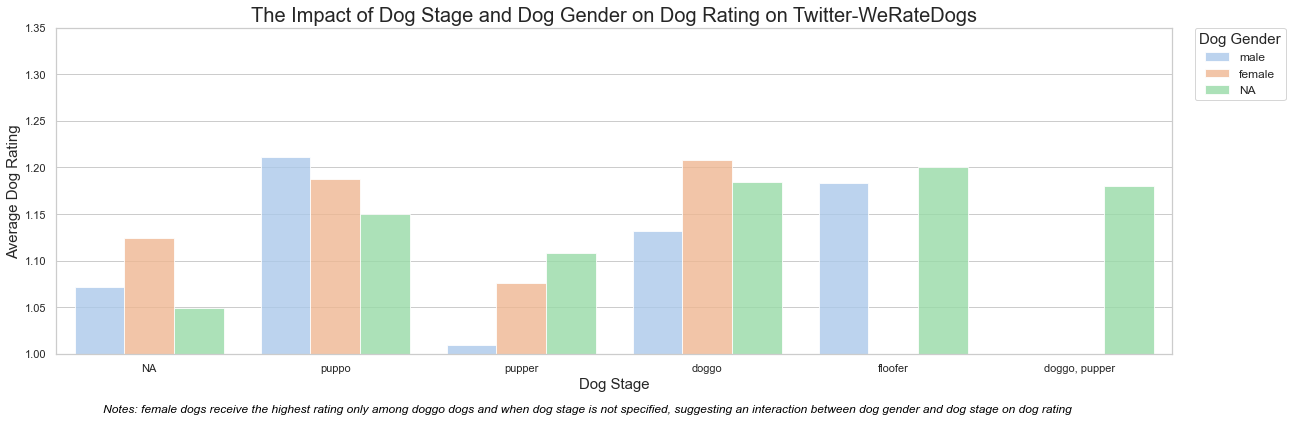

In [485]:
plt.figure(figsize = (20,6))

plt.title('The Impact of Dog Stage and Dog Gender on Dog Rating on Twitter-WeRateDogs', fontsize = 20)

sns.barplot(x="dog_stage", 
            y="dog_rating",
            hue ='dog_gender',
            ci=None,
            data=df_analysis,
            alpha = 0.8)

plt.ylim(1, 1.35)

plt.xlabel('Dog Stage', fontsize =15)
plt.ylabel('Average Dog Rating',fontsize=15)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, 
           title = 'Dog Gender', title_fontsize = 15, 
           fontsize = 12)
plt.text(-0.25,0.94, conclusion, fontsize = 12, color = 'black', fontstyle = 'italic',
          horizontalalignment='left', verticalalignment='center', wrap = True)

plt.savefig('F_Int.jpg',bbox_inches = 'tight',pad_inches= 0.3)
plt.show()

In [478]:
df_analysis.groupby(['dog_stage','dog_gender']).mean()[['dog_rating']]

dog_rating
dog_stage     dog_gender            
NA            NA            1.049662
              female        1.124354
              male          1.071938
doggo         NA            1.184211
              female        1.208333
              male          1.132143
doggo, pupper NA            1.180000
floofer       NA            1.200000
              male          1.183333
pupper        NA            1.108219
              female        1.076486
              male          1.009195
puppo         NA            1.150000
              female        1.187500
              male          1.211111

In [459]:
#conduct a follow ANOVA to see whether the suggested interaction is significant -- results suggest the interaction is significant
model_int = ols('dog_rating ~ C(dog_gender) +  C(dog_stage) + C(dog_gender)* C(dog_stage)', data=df_analysis).fit()
anova_int = sm.stats.anova_lm(model_int, typ=3)
anova_int

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,513.434653,1.0,20061.466668,0.000000e+00
C(dog_gender),0.966573,2.0,18.883489,7.606736e-09
C(dog_stage),0.646950,5.0,5.055661,1.316115e-04
C(dog_gender):C(dog_stage),0.887044,10.0,3.465955,1.077819e-03
Residual,47.577529,1859.0,NaN,NaN


#### Create supplementary figures for insights

In [523]:
#create a bar chat function
def supp_bar_chats(x,name,conclusion,p1):
    
    plt.figure(figsize = (10,6))
    plt.title('The Impact of ' + name + ' on Dog Rating on Twitter-WeRateDogs', fontsize = 15)
    
    sns.barplot(x=x, 
            y="dog_rating",
            data=df_analysis,
            ci = None,
            alpha = 0.8)
    
    plt.ylim(1, 1.25)
    
    plt.xlabel(name, fontsize = 12)
    plt.ylabel('Average Dog Rating',fontsize= 12)
    plt.text(p1,0.96,conclusion, fontsize = 12, color = 'black', fontstyle = 'italic',
          horizontalalignment='left', verticalalignment='center', wrap = True)
    
    plt.savefig('F_'+x+'.jpg',bbox_inches = 'tight',pad_inches= 0.3)
    plt.show()

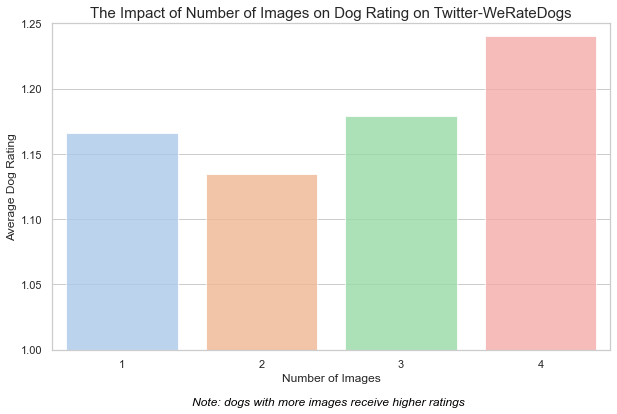

In [530]:
#create a bar chat to virsualize the impact of number of images on dog rating
conclusion_img = 'Note: dogs with more images receive higher ratings'
supp_bar_chats('img_num','Number of Images',conclusion_img,0.5)

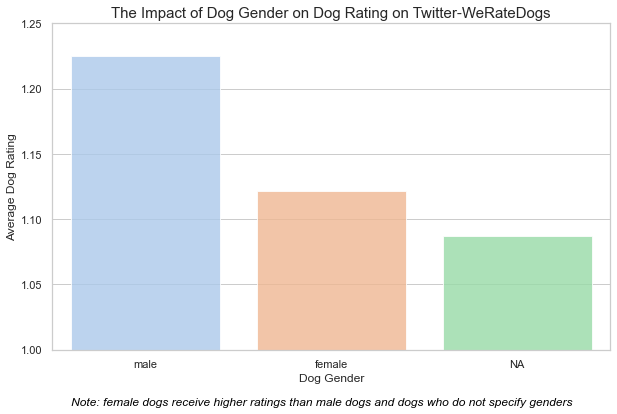

In [531]:
#create a bar chat to virsualize the impact of dog gender on dog rating
conclusion_gender = "Note: female dogs receive higher ratings than male dogs and dogs who do not specify genders"
supp_bar_chats('dog_gender','Dog Gender',conclusion_gender,-0.4)

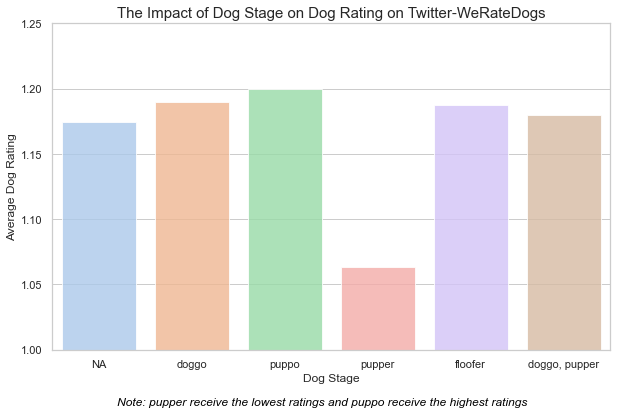

In [535]:
#create a bar chat to virsualize the impact of dog stage on dog rating
conclusion_stage = "Note: pupper receive the lowest ratings and puppo receive the highest ratings"
supp_bar_chats('dog_stage','Dog Stage',conclusion_stage,0.2)

In [226]:
#create a scatter plot function
def supp_scatter_chats(y,name):
    
    plt.figure(figsize = (12,8))
    plt.title('The Relationship Between ' + name + ' and Dog Rating on Twitter-WeRateDogs', fontsize = 18)
    
    sns.scatterplot(x = "dog_rating", 
            y=y,
            data=df_analysis,
            alpha = 0.8)
    
    plt.xlabel('Dog Rating', fontsize = 15)
    plt.ylabel(name,fontsize= 15)
    
    plt.savefig('F_'+y+'.jpg',bbox_inches = 'tight',pad_inches= 0.3)
    plt.show()

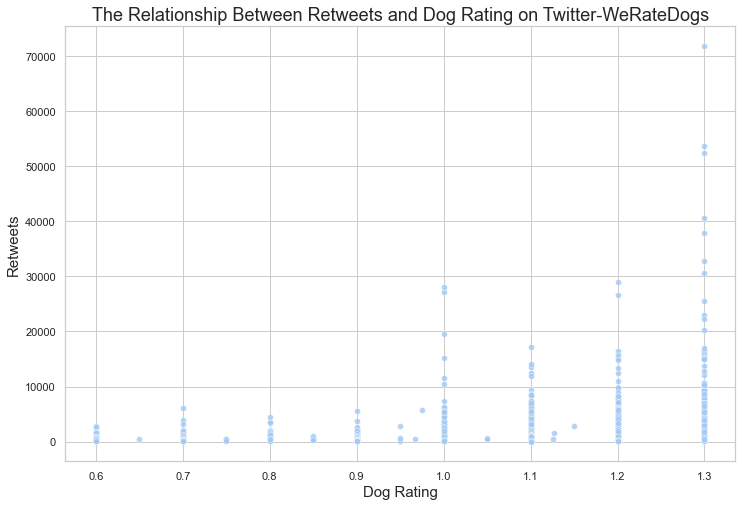

In [227]:
##create a scatter plot to virsualize the impact of retweets on dog rating
supp_scatter_chats('retweets','Retweets')

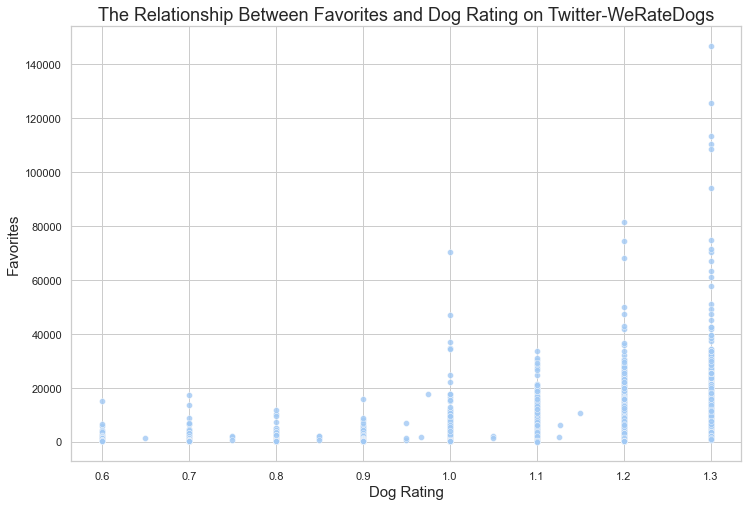

In [228]:
##create a scatter plot to virsualize the impact of favorites on dog rating
supp_scatter_chats('favorites','Favorites')